# Statistiques de corpus

## Préliminaires

Pour mieux comprendre les choix qui s'offrirons à nous par la suite, nous allons commencer par utiliser des outils élémentaires
### Questions
1.Téléchargez le texte qui se trouve à l'URL: "https://gutenberg.org/files/84/84-0.txt". Débarrassez vous des 1457 premiers caractères puis, en utilisant des expressions régulières, débarrassez vous également de la mise en page en paragraphes. Combien de caractères contient ce texte?  
2.Ce roman va constituer notre premier corpus. Nous devons également déterminer ce que nous allons considèrer comme étant des mots. Est-ce que les signes de ponctuations sont des mots? Est-ce que les mots en majuscules sont différents des mots en minuscules? Que faire des contractions signalées par des apostrophes comme par exemple: I'm, don't ? Avec l'option que vous aurez choisie, combien mots contient le corpus? Combien de mots uniques?  
3.Quels sont les 100 mots les plus fréquents? Les 100 mots avec le moins d'occurrences?   
4.Loi de Zipf: Tracez la distribution des fréquences d'occurrences des mots (par exemple vous pouvez utiliser un histogramme).



In [1]:
import requests
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
URL = "https://gutenberg.org/files/84/84-0.txt"
page = requests.get(URL)

In [3]:
text = page.content[1458:].decode()
text[:1000]

'Letter 1\r\n\r\n_To Mrs. Saville, England._\r\n\r\n\r\nSt. Petersburgh, Dec. 11th, 17—.\r\n\r\n\r\nYou will rejoice to hear that no disaster has accompanied the\r\ncommencement of an enterprise which you have regarded with such evil\r\nforebodings. I arrived here yesterday, and my first task is to assure\r\nmy dear sister of my welfare and increasing confidence in the success\r\nof my undertaking.\r\n\r\nI am already far north of London, and as I walk in the streets of\r\nPetersburgh, I feel a cold northern breeze play upon my cheeks, which\r\nbraces my nerves and fills me with delight. Do you understand this\r\nfeeling? This breeze, which has travelled from the regions towards\r\nwhich I am advancing, gives me a foretaste of those icy climes.\r\nInspirited by this wind of promise, my daydreams become more fervent\r\nand vivid. I try in vain to be persuaded that the pole is the seat of\r\nfrost and desolation; it ever presents itself to my imagination as the\r\nregion of beauty and de

# Text preprocessor

In [4]:
"""
# keep words
# new_text = re.sub(r'\W+', r' ', text)
new_text = re.sub(r'\W+', r' ', text)
# digits
new_text = re.sub(r'\d+', r'', new_text)
# underscore
new_text = re.sub(r'\_', r'', new_text)
# multiple space
new_text = re.sub(r'\  +', r' ', new_text)
"""
words = re.split(' |\.|\,|\n|\r|\_|\—|\“|\"|\”|\?|\!|\:|\;|\(|\)|\[|\]', text)
words = [x for x in words if x]
words[:4000]

['Letter',
 '1',
 'To',
 'Mrs',
 'Saville',
 'England',
 'St',
 'Petersburgh',
 'Dec',
 '11th',
 '17',
 'You',
 'will',
 'rejoice',
 'to',
 'hear',
 'that',
 'no',
 'disaster',
 'has',
 'accompanied',
 'the',
 'commencement',
 'of',
 'an',
 'enterprise',
 'which',
 'you',
 'have',
 'regarded',
 'with',
 'such',
 'evil',
 'forebodings',
 'I',
 'arrived',
 'here',
 'yesterday',
 'and',
 'my',
 'first',
 'task',
 'is',
 'to',
 'assure',
 'my',
 'dear',
 'sister',
 'of',
 'my',
 'welfare',
 'and',
 'increasing',
 'confidence',
 'in',
 'the',
 'success',
 'of',
 'my',
 'undertaking',
 'I',
 'am',
 'already',
 'far',
 'north',
 'of',
 'London',
 'and',
 'as',
 'I',
 'walk',
 'in',
 'the',
 'streets',
 'of',
 'Petersburgh',
 'I',
 'feel',
 'a',
 'cold',
 'northern',
 'breeze',
 'play',
 'upon',
 'my',
 'cheeks',
 'which',
 'braces',
 'my',
 'nerves',
 'and',
 'fills',
 'me',
 'with',
 'delight',
 'Do',
 'you',
 'understand',
 'this',
 'feeling',
 'This',
 'breeze',
 'which',
 'has',
 'travell

In [5]:
# nombre de mots
print(len(words))

78146


# Frequency

In [6]:
word_freq = {i:words.count(i) for i in set(words)}
word_freq

{'anatomise': 1,
 'folly': 2,
 'cast': 12,
 'exclamation': 3,
 'incline': 1,
 'sting': 4,
 'rendering': 1,
 'spirits': 31,
 'unbounded': 3,
 'deceit': 2,
 'drive': 4,
 'shunned': 3,
 'charity': 2,
 'remedy': 1,
 'instance': 1,
 'Westmorland': 2,
 'Vanilla': 2,
 'destined': 5,
 'forgo': 1,
 'create': 9,
 'allow': 14,
 'doing': 8,
 'united': 6,
 'wearing': 1,
 'Creating': 1,
 'homeward': 1,
 'motive': 2,
 'ogre': 1,
 'references': 2,
 'safe': 7,
 'Germany': 3,
 'irretrievably': 1,
 'relief': 4,
 'passage': 9,
 'indulge': 2,
 'gardener': 1,
 'accounted': 1,
 'vexations': 1,
 'plank': 1,
 'stare': 1,
 'self-sacrifice': 1,
 'whitewashed': 1,
 'European': 2,
 '1500': 1,
 'toils': 8,
 'measure': 3,
 'lover': 8,
 'yielded': 3,
 'survivors': 2,
 'excites': 1,
 'composed': 5,
 'sympathised': 5,
 'obscurely': 1,
 'blamable': 1,
 'disliked': 1,
 'praised': 1,
 'poignantly': 1,
 '‘monster': 1,
 'highest': 4,
 'Belrive': 4,
 'eleven': 1,
 'Dante': 1,
 'stifle': 2,
 '2': 5,
 'flashes': 2,
 'twenty-ei

In [7]:
len(word_freq.keys())

7919

In [8]:
# word_freq_sorted = dict(sorted(word_freq.items(),key= lambda x:x[1]))

In [9]:
ws, fqs = [], []
for k in word_freq.keys():
    ws += [k]
    fqs += [word_freq[k]]
    
word_freq_dict = {
    "words": ws,
    "freq": fqs
}

In [10]:
df = pd.DataFrame.from_dict(word_freq_dict)
df

,words,freq
0,anatomise,1
1,folly,2
2,cast,12
3,exclamation,3
4,incline,1
...,...,...
7914,ranging,1
7915,Beware,1
7916,aunt,9
7917,experience,7


In [11]:
df.sort_values(['freq'])[:100]

,words,freq
0,anatomise,1
4356,griefs,1
4351,disastrous,1
4350,obedient,1
4349,inestimable,1
...,...,...
4536,sobs,1
4538,orbs,1
4564,dazzling,1
4563,proportionate,1


In [12]:
df.sort_values(['freq'])[-100:]

,words,freq
2809,You,86
663,those,88
7311,Elizabeth,88
5308,other,89
3446,found,90
...,...,...
5240,to,2156
4761,of,2745
3273,I,2846
5668,and,3000


## Loi de Zipf

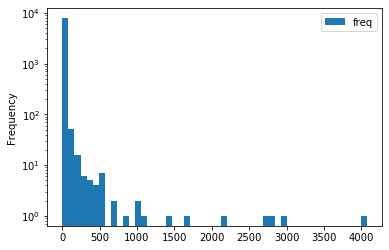

In [13]:
ax = df.plot.hist(bins=50)
ax.set_yscale('log')

## Loi de Heaps

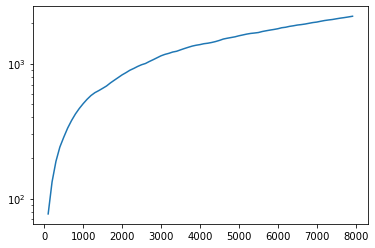

In [14]:
#f, axs = plt.subplots(2, 4, sharey=True, figsize=(15,15))
#ax_i, ax_j = 0, 0
uniq, all_w = [], []
for i in range(100, 8000, 100):
    if i == 7900:
        i = 7919
            
    corpus = words[:i]
    word_freq = {k:corpus.count(k) for k in set(corpus)}
    uniq += [len(word_freq)]
    all_w += [len(corpus)]
    
plt.plot(all_w, uniq)
plt.yscale('log')

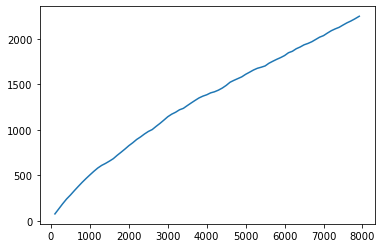

In [15]:
plt.plot(all_w, uniq)

In [16]:
print("all_w", all_w)
print("uniq", uniq)

all_w [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7919]
uniq [77, 133, 189, 241, 285, 333, 379, 424, 466, 506, 545, 581, 610, 632, 657, 684, 721, 755, 790, 827, 859, 895, 923, 955, 983, 1004, 1039, 1072, 1108, 1145, 1173, 1194, 1221, 1237, 1267, 1296, 1324, 1351, 1371, 1386, 1407, 1419, 1437, 1460, 1489, 1524, 1545, 1564, 1583, 1611, 1634, 1658, 1677, 1689, 1703, 1733, 1755, 1776, 1795, 1817, 1848, 1864, 1892, 1911, 1935, 1950, 1969, 1994, 2019, 2036, 2064, 2090, 2110, 2127, 2152, 2176, 2196, 2219, 2249]


In [17]:
from sklearn.linear_model import LinearRegression

all_w = np.log(np.array(all_w).reshape(-1,1))
uniq = np.log(np.array(uniq).reshape(-1,1))

reg = LinearRegression().fit(all_w, uniq)
print(reg.coef_)
print(np.exp(reg.intercept_))

[[0.74983702]]
[2.72546127]


## byte-pair encoding

In [18]:
corpus = words
word_freq = {k:corpus.count(k) for k in set(corpus)}

In [105]:
def byte_pair_encoding(df_word_freq, k=100):
    
    # sort by frequency
    df_word_freq = df_word_freq.sort_values(['freq'], ascending=False)
    
    # split and add '_'
    splited = []
    for w in df_word_freq['words']:
        splited += [list(w) + ['_']] 
    df_word_freq['splitted'] = splited
    
    # build vocab
    vocab = []
    for s in df_word_freq['splitted']:
        for l in s:
            if l not in vocab:
                vocab += [l]
                
    print('initial vocab len:', len(vocab))
    print(vocab)
    print("===================")
    
    for i in range(k):
        #print("=============================================================")
        #print("=============================================================")
        #print("=============================================================")
        #print(i, 'vocab:', vocab)
        
        tmp_dic = {}
        for w_s in df_word_freq['splitted']:
            for l_i in range(len(w_s)-1):
                
                pattern = w_s[l_i] + w_s[l_i + 1]
                
                if pattern not in tmp_dic.keys():
                    tmp_dic[pattern] = 1
                else:
                    tmp_dic[pattern] += 1
        tmp_df = pd.DataFrame.from_dict(tmp_dic, orient='index', columns=['freq']).sort_values(['freq'], ascending=False)
        for w in tmp_df.index.tolist():
            if w not in vocab:
                most_freq_pattern = w
                break
        
        #print("most_freq_pattern:", most_freq_pattern)
        
        if most_freq_pattern not in vocab:
            print("adding ", most_freq_pattern)
            vocab += [most_freq_pattern]
            # update corpus
            for w_s_i in range(len(df_word_freq['splitted'])):
                new_splitted_w = []
                w_s = df_word_freq['splitted'][w_s_i]
                old_l_i = 0
                for l_i in range(len(w_s)-1):
                    # print('l_i:', l_i, 'old_l_i:', old_l_i)
                    pattern = w_s[l_i] + w_s[l_i + 1]
                    if pattern == most_freq_pattern:
                        new_splitted_w += [most_freq_pattern]
                    else:
                        new_splitted_w += [w_s[l_i]]
                
                # print(''.join(w_s), ''.join(new_splitted_w))
                        
                if str(''.join(new_splitted_w)) == str(''.join(w_s)):
                    df_word_freq.splitted.loc[w_s_i] = new_splitted_w
                    #print(w_s_i, "new_splitted_w:", new_splitted_w)
        
    return df_word_freq, vocab

In [108]:
df_word_freq, vocab = byte_pair_encoding(df, k=20000)

initial vocab len: 75
['t', 'h', 'e', '_', 'a', 'n', 'd', 'I', 'o', 'f', 'm', 'y', 'i', 'w', 's', 'c', 'b', 'u', 'r', 'v', 'T', 'l', 'M', 'B', 'H', 'p', 'g', 'E', 'z', 'Y', 'P', 'j', 'k', 'S', 'C', 'W', 'G', '-', 'J', 'F', 'x', '1', 'A', '’', 'V', 'q', 'O', 'D', 'N', 'æ', 'L', 'U', '3', 'K', '7', '4', 'R', '2', '8', 'ê', '‘', '*', '9', '5', "'", '6', '0', '/', '$', 'ô', 'é', 'Q', 'X', '%', 'è']
adding  s_


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


adding  d_
adding  in
adding  e_
adding  ed_
adding  er
adding  en
adding  on
adding  re
adding  ng
adding  ti
adding  y_
adding  at
adding  t_
adding  g_
adding  ng_
adding  ing_
adding  n_
adding  ar
adding  es
adding  an
adding  te
adding  st
adding  io
adding  ra
adding  co
adding  de
adding  ea
adding  nt
adding  is
adding  or
adding  al
adding  ou
adding  ri
adding  r_
adding  it
adding  es_
adding  ur
adding  ro
adding  el
adding  li
adding  nc
adding  la
adding  un
adding  ly_
adding  on_
adding  ta
adding  pr
adding  di
adding  si
adding  le
adding  nd
adding  tr
adding  ec
adding  l_
adding  th
adding  ic
adding  ted_
adding  as
adding  ve
adding  pe
adding  ne
adding  ion_
adding  er_
adding  ac
adding  se
adding  me
adding  ch
adding  ha
adding  lo
adding  ai
adding  em
adding  pa
adding  il
adding  le_
adding  om
adding  ca
adding  tion_
adding  ma
adding  he
adding  ns
adding  ss
adding  nt_
adding  sh
adding  su
adding  ce_
adding  mp
adding  mi
adding  ce
adding  im
add

adding  ption_
adding  ty
adding  ern_
adding  nge_
adding  ever_
adding  lc
adding  ian_
adding  here_
adding  ately_
adding  ressed_
adding  tal_
adding  ements_
adding  itude_
adding  row_
adding  rsed_
adding  yr
adding  tl
adding  ided_
adding  -s
adding  ster_
adding  gly_
adding  l-
adding  cle_
adding  gg
adding  nw
adding  ssing_
adding  lation_
adding  shing_
adding  ards_
adding  ining_
adding  ym
adding  erable_
adding  Ar
adding  ven_
adding  Pa
adding  ee_
adding  as_
adding  rned_
adding  rent_
adding  ented_
adding  nl
adding  ust_
adding  own_
adding  iu
adding  rence_
adding  amed_
adding  mer_
adding  ej
adding  tness_
adding  ink_
adding  eless_
adding  ances_
adding  sf
adding  lated_
adding  ending_
adding  sq
adding  ach_
adding  ok_
adding  tures_
adding  vered_
adding  ought_
adding  sity_
adding  tors_
adding  ays_
adding  lied_
adding  rmed_
adding  ook_
adding  erate_
adding  unt_
adding  ets_
adding  -c
adding  xi
adding  ices_
adding  ects_
adding  tter_
a

adding  ler_
adding  reating_
adding  ND_
adding  ees_
adding  uished_
adding  oms_
adding  ulness_
adding  fulness_
adding  lected_
adding  etting_
adding  kes_
adding  ngled_
adding  int_
adding  ens_
adding  eam_
adding  bles_
adding  ormed_
adding  formed_
adding  rder_
adding  rary_
adding  acle_
adding  tended_
adding  mple_
adding  dow_
adding  vent_
adding  ctive_
adding  Fo
adding  ither_
adding  lish_
adding  lace_
adding  tend_
adding  rting_
adding  let_
adding  eeded_
adding  ON
adding  uish_
adding  uction_
adding  ssible_
adding  don_
adding  anged_
adding  tern_
adding  ushed_
adding  bling_
adding  ersed_
adding  etter_
adding  eck_
adding  ulations_
adding  oad_
adding  fect_
adding  fice_
adding  arch_
adding  TR
adding  oat_
adding  ionate_
adding  Ex
adding  vice_
adding  mission_
adding  now_
adding  ross_
adding  iend_
adding  gy_
adding  other_
adding  rmation_
adding  EM
adding  eared_
adding  CT_
adding  lay_
adding  ues_
adding  sent_
adding  ash_
adding  fic

adding  long_
adding  fter_
adding  oked_
adding  tled_
adding  ild_
adding  form_
adding  lved_
adding  olved_
adding  nner_
adding  ady_
adding  mine_
adding  loved_
adding  othing_
adding  lieve_
adding  elieve_
adding  Bl
adding  bute_
adding  ibute_
adding  ribute_
adding  tribute_
adding  ngers_
adding  rying_
adding  hised_
adding  rgh_
adding  urgh_
adding  burgh_
adding  fort_
adding  treating_
adding  dom_
adding  orded_
adding  hief_
adding  chief_
adding  dying_
adding  erably_
adding  dingly_
adding  llen_
adding  arrow_
adding  ores_
adding  lave_
adding  prise_
adding  rprise_
adding  ra_
adding  rtions_
adding  jects_
adding  erness_
adding  lease_
adding  mage_
adding  nful_
adding  rush_
adding  places_
adding  urious_
adding  veness_
adding  iveness_
adding  tiveness_
adding  ilt_
adding  inue_
adding  tinue_
adding  ntinue_
adding  ontinue_
adding  cured_
adding  motion_
adding  yard_
adding  pected_
adding  sign_
adding  dress_
adding  mount_
adding  eption_
adding

adding  neral_
adding  ren_
adding  tically_
adding  tand_
adding  stand_
adding  icted_
adding  ectual_
adding  ED_
adding  sume_
adding  kling_
adding  gence_
adding  efully_
adding  andering_
adding  iless_
adding  ceed_
adding  ulty_
adding  isition_
adding  uisition_
adding  quisition_
adding  ghty_
adding  athy_
adding  pathy_
adding  ER
adding  nm
adding  ndle_
adding  nent_
adding  tacle_
adding  ocks_
adding  inations_
adding  Is
adding  raged_
adding  Lo
adding  resses_
adding  gling_
adding  urns_
adding  nsive_
adding  ensive_
adding  sited_
adding  acked_
adding  ule_
adding  ECT_
adding  bbed_
adding  otent_
adding  potent_
adding  joyed_
adding  allowed_
adding  mists_
adding  llect_
adding  leep_
adding  face_
adding  mely_
adding  ja
adding  ware_
adding  nx
adding  ton_
adding  ughter_
adding  aughter_
adding  ‘A
adding  ird_
adding  bit_
adding  ntations_
adding  fund_
adding  ams_
adding  eams_
adding  reams_
adding  yright_
adding  9_
adding  GR
adding  gible_
addi

adding  Mu
adding  gun_
adding  morrow_
adding  harm_
adding  pitation_
adding  easy_
adding  kening_
adding  ckening_
adding  ickening_
adding  sickening_
adding  ofessor_
adding  rofessor_
adding  AT
adding  IO
adding  ench_
adding  rench_
adding  etly_
adding  dary_
adding  ndary_
adding  reaking_
adding  produce_
adding  ntage_
adding  sakes_
adding  veries_
adding  onately_
adding  ionately_
adding  rrows_
adding  orrows_
adding  playing_
adding  mense_
adding  mmense_
adding  rease_
adding  crease_
adding  ncrease_
adding  mulated_
adding  Pardon_
adding  aises_
adding  raises_
adding  akness_
adding  eakness_
adding  rawn_
adding  drawn_
adding  lained_
adding  plained_
adding  volved_
adding  evolved_
adding  Eu
adding  icited_
adding  licited_
adding  olicited_
adding  solicited_
adding  lecting_
adding  warm_
adding  strain_
adding  otted_
adding  lotted_
adding  hung_
adding  bear_
adding  itional_
adding  ditional_
adding  dditional_
adding  ulted_
adding  sulted_
adding  n

adding  AM
adding  lays_
adding  plays_
adding  armer_
adding  earch_
adding  search_
adding  ceasing_
adding  oads_
adding  roads_
adding  -a
adding  lorious_
adding  glorious_
adding  ncient_
adding  anly_
adding  herly_
adding  therly_
adding  SS_
adding  oing_
adding  lements_
adding  iolence_
adding  violence_
adding  nising_
adding  dish_
adding  vow_
adding  ntless_
adding  untless_
adding  rtal_
adding  ortal_
adding  mortal_
adding  U_
adding  gions_
adding  cipated_
adding  icipated_
adding  ticipated_
adding  fs_
adding  iately_
adding  diately_
adding  ediately_
adding  mediately_
adding  mmediately_
adding  sitions_
adding  Go
adding  eceive_
adding  rd’s_
adding  vouring_
adding  --
adding  tiently_
adding  atiently_
adding  patiently_
adding  nows_
adding  pid_
adding  Le
adding  vate_
adding  embling_
adding  Ta
adding  asons_
adding  easons_
adding  loy_
adding  pported_
adding  upported_
adding  supported_
adding  ider_
adding  oyments_
adding  ocked_
adding  iversity

adding  onstrate_
adding  monstrate_
adding  emonstrate_
adding  berated_
adding  tement_
adding  piness_
adding  ppiness_
adding  appiness_
adding  happiness_
adding  nstructed_
adding  quished_
adding  nquished_
adding  ciated_
adding  ege_
adding  lege_
adding  rties_
adding  kled_
adding  aped_
adding  rment_
adding  etary_
adding  ietary_
adding  rietary_
adding  prietary_
adding  oprietary_
adding  roprietary_
adding  proprietary_
adding  Du
adding  avour_
adding  sently_
adding  esently_
adding  resently_
adding  astened_
adding  hastened_
adding  cean_
adding  trance_
adding  poses_
adding  16_
adding  Great_
adding  tar_
adding  turns_
adding  aunted_
adding  elighted_
adding  ecent_
adding  fession_
adding  nfused_
adding  uated_
adding  tuated_
adding  eble_
adding  icle_
adding  tp
adding  nkind_
adding  ankind_
adding  mankind_
adding  mpressed_
adding  looks_
adding  lged_
adding  ulged_
adding  nour_
adding  lict_
adding  flict_
adding  nflict_
adding  serted_
adding  ul

adding  pending_
adding  event_
adding  rteen_
adding  forms_
adding  mited_
adding  imited_
adding  limited_
adding  rating_
adding  erating_
adding  lains_
adding  atic_
adding  isten_
adding  word_
adding  bers_
adding  mbers_
adding  dressed_
adding  fall_
adding  oats_
adding  hairs_
adding  nshine_
adding  eward_
adding  hite_
adding  white_
adding  aults_
adding  satisfied_
adding  Or
adding  ething_
adding  mething_
adding  omething_
adding  half_
adding  eman_
adding  leman_
adding  olt_
adding  ttle_
adding  ittle_
adding  berty_
adding  ecause_
adding  eator_
adding  reator_
adding  mitting_
adding  lack_
adding  bours_
adding  allow_
adding  -house_
adding  dowed_
adding  link_
adding  wore_
adding  teries_
adding  called_
adding  nformed_
adding  NO
adding  tments_
adding  uire_
adding  quire_
adding  esented_
adding  resented_
adding  presented_
adding  xy
adding  lmost_
adding  ersion_
adding  version_
adding  WA
adding  Fe
adding  minated_
adding  00_
adding  vaded_
add

adding  rval_
adding  erval_
adding  coming_
adding  barks_
adding  utely_
adding  itely_
adding  sping_
adding  asping_
adding  fying_
adding  emy_
adding  nemy_
adding  enemy_
adding  rvation_
adding  aired_
adding  paired_
adding  idable_
adding  GU
adding  umes_
adding  rand_
adding  onger_
adding  EMENT_
adding  rmly_
adding  vity_
adding  dam_
adding  thers_
adding  others_
adding  denly_
adding  It_
adding  ddenly_
adding  never_
adding  agers_
adding  uddenly_
adding  20
adding  iner_
adding  riner_
adding  ariner_
adding  letter_
adding  pelled_
adding  tains_
adding  last_
adding  eace_
adding  eturn_
adding  If_
adding  enue_
adding  venue_
adding  enge_
adding  venge_
adding  metimes_
adding  ometimes_
adding  hus_
adding  kindness_
adding  fiend_
adding  ant’s_
adding  adows_
adding  ndour_
adding  gentle_
adding  joy_
adding  nently_
adding  inently_
adding  minently_
adding  oung_
adding  kill_
adding  veral_
adding  everal_
adding  iderate_
adding  siderate_
adding  nsi

adding  uffeted_
adding  buffeted_
adding  odel_
adding  model_
adding  cember_
adding  ecember_
adding  hways_
adding  thways_
adding  athways_
adding  pathways_
adding  enement_
adding  tenement_
adding  Guided_
adding  tiness_
adding  ltiness_
adding  ultiness_
adding  aultiness_
adding  faultiness_
adding  ntification_
adding  entification_
adding  dentification_
adding  identification_
adding  Boy_
adding  Reuss_
adding  arised_
adding  iarised_
adding  liarised_
adding  iliarised_
adding  miliarised_
adding  amiliarised_
adding  familiarised_
adding  tyard_
adding  rtyard_
adding  urtyard_
adding  ourtyard_
adding  courtyard_
adding  dside_
adding  edside_
adding  bedside_
adding  glowed_
adding  amage_
adding  damage_
adding  oasting_
adding  coasting_
adding  etrod_
adding  retrod_
adding  ursting_
adding  bursting_
adding  ledges_
adding  sledges_
adding  piring_
adding  spiring_
adding  nspiring_
adding  inspiring_
adding  tchen_
adding  itchen_
adding  kitchen_
adding  dread

adding  VI
adding  EMARK_
adding  anscription_
adding  ranscription_
adding  transcription_
adding  ebble_
adding  pebble_
adding  viving_
adding  rviving_
adding  urviving_
adding  surviving_
adding  amented_
adding  lamented_
adding  dsome_
adding  ndsome_
adding  andsome_
adding  handsome_
adding  llible_
adding  allible_
adding  fallible_
adding  nfallible_
adding  infallible_
adding  nstairs_
adding  wnstairs_
adding  ownstairs_
adding  downstairs_
adding  nticipated_
adding  anticipated_
adding  ictured_
adding  pictured_
adding  aordinary_
adding  raordinary_
adding  traordinary_
adding  xtraordinary_
adding  extraordinary_
adding  tonations_
adding  ntonations_
adding  intonations_
adding  rvest_
adding  arvest_
adding  harvest_
adding  parting_
adding  mparting_
adding  imparting_
adding  Despondency_
adding  availed_
adding  peck_
adding  speck_
adding  tently_
adding  ntently_
adding  intently_
adding  thouse_
adding  uthouse_
adding  outhouse_
adding  siting_
adding  ositin

adding  Scoffing_
adding  bbled_
adding  abbled_
adding  dabbled_
adding  aspired_
adding  eples_
adding  xchange_
adding  exchange_
adding  efine_
adding  define_
adding  inned_
adding  sinned_
adding  wim_
adding  swim_
adding  MAGE_
adding  monies_
adding  imonies_
adding  timonies_
adding  stimonies_
adding  estimonies_
adding  testimonies_
adding  orcing_
adding  forcing_
adding  REPLACEMENT_
adding  ditor_
adding  uditor_
adding  auditor_
adding  Happy_
adding  -man_
adding  vader_
adding  nvader_
adding  invader_
adding  uhammadan_
adding  emulation_
adding  rchanging_
adding  erchanging_
adding  terchanging_
adding  nterchanging_
adding  interchanging_
adding  gies_
adding  rgies_
adding  ergies_
adding  nergies_
adding  energies_
adding  stering_
adding  estering_
adding  festering_
adding  oposed_
adding  roposed_
adding  proposed_
adding  glowing_
adding  lloy_
adding  alloy_
adding  geny_
adding  ogeny_
adding  rogeny_
adding  progeny_
adding  newing_
adding  enewing_
addin

adding  code_
adding  oter_
adding  moter_
adding  emoter_
adding  remoter_
adding  hrank_
adding  shrank_
adding  ybreak_
adding  aybreak_
adding  daybreak_
adding  ssect_
adding  issect_
adding  dissect_
adding  sailing_
adding  26th_
adding  ntant_
adding  entant_
adding  pentant_
adding  epentant_
adding  repentant_
adding  rifting_
adding  drifting_
adding  ERG-tm_
adding  BERG-tm_
adding  59
adding  erers_
adding  verers_
adding  overers_
adding  coverers_
adding  scoverers_
adding  iscoverers_
adding  discoverers_
adding  bones_
adding  wamp_
adding  swamp_
adding  nceiving_
adding  onceiving_
adding  conceiving_
adding  rberated_
adding  erberated_
adding  verberated_
adding  everberated_
adding  reverberated_
adding  ortless_
adding  fortless_
adding  midable_
adding  rmidable_
adding  ormidable_
adding  formidable_
adding  ranced_
adding  tranced_
adding  ntranced_
adding  entranced_
adding  Abbey_
adding  scion_
adding  opted_
adding  dopted_
adding  adopted_
adding  iary_
a

adding  mediable_
adding  emediable_
adding  remediable_
adding  rremediable_
adding  irremediable_
adding  sigh_
adding  6-1887_
adding  udness_
adding  oudness_
adding  loudness_
adding  nings_
adding  At
adding  gger_
adding  agger_
adding  dagger_
adding  ocious_
adding  rocious_
adding  trocious_
adding  atrocious_
adding  tirement_
adding  etirement_
adding  retirement_
adding  gross_
adding  rides_
adding  brides_
adding  ilish_
adding  vilish_
adding  evilish_
adding  devilish_
adding  neeling_
adding  utored_
adding  tutored_
adding  mpass_
adding  ompass_
adding  compass_
adding  laining_
adding  plaining_
adding  xplaining_
adding  explaining_
adding  peeping_
adding  ozing_
adding  dozing_
adding  December_
adding  pherd_
adding  epherd_
adding  hepherd_
adding  shepherd_
adding  diments_
adding  ediments_
adding  pediments_
adding  mpediments_
adding  impediments_
adding  sisting_
adding  ssisting_
adding  assisting_
adding  nker_
adding  anker_
adding  banker_
adding  rti

adding  maginative_
adding  imaginative_
adding  iped_
adding  wiped_
adding  xampled_
adding  exampled_
adding  nexampled_
adding  unexampled_
adding  umely_
adding  tumely_
adding  ntumely_
adding  ontumely_
adding  contumely_
adding  sfaction_
adding  isfaction_
adding  tisfaction_
adding  atisfaction_
adding  satisfaction_
adding  596-1887_
adding  terations_
adding  lterations_
adding  alterations_
adding  nside_
adding  inside_
adding  -satisfaction_
adding  f-satisfaction_
adding  lf-satisfaction_
adding  elf-satisfaction_
adding  self-satisfaction_
adding  aract_
adding  taract_
adding  ataract_
adding  cataract_
adding  lourished_
adding  flourished_
adding  chy_
adding  treats_
adding  etreats_
adding  retreats_
adding  scontinue_
adding  iscontinue_
adding  discontinue_
adding  hamed_
adding  shamed_
adding  ashamed_
adding  wnloading_
adding  ownloading_
adding  downloading_
adding  PH_
adding  ictions_
adding  rictions_
adding  trictions_
adding  strictions_
adding  estric

adding  Wretched_
adding  xions_
adding  exions_
adding  lexions_
adding  plexions_
adding  mplexions_
adding  omplexions_
adding  complexions_
adding  braces_
adding  basing_
adding  ebasing_
adding  debasing_
adding  AD_
adding  EAD_
adding  READ_
adding  -land_
adding  brows_
adding  hunted_
adding  countable_
adding  ccountable_
adding  accountable_
adding  naccountable_
adding  unaccountable_
adding  bons_
adding  mix_
adding  aversing_
adding  raversing_
adding  traversing_
adding  /copyright_
adding  iberated_
adding  liberated_
adding  k/copyright_
adding  rk/copyright_
adding  ark/copyright_
adding  mark/copyright_
adding  emark/copyright_
adding  demark/copyright_
adding  ademark/copyright_
adding  rademark/copyright_
adding  trademark/copyright_
adding  tedly_
adding  hale_
adding  whale_
adding  Destiny_
adding  beying_
adding  obeying_
adding  TNESS_
adding  ITNESS_
adding  imental_
adding  rimental_
adding  trimental_
adding  etrimental_
adding  detrimental_
adding  ancem

adding  mandate_
adding  splays_
adding  isplays_
adding  displays_
adding  dealing_
adding  vre-de-Grace_
adding  avre-de-Grace_
adding  23_
adding  nities_
adding  unities_
adding  tunities_
adding  rtunities_
adding  ortunities_
adding  portunities_
adding  pportunities_
adding  opportunities_
adding  ciences_
adding  sciences_
adding  olness_
adding  oolness_
adding  coolness_
adding  etted_
adding  retted_
adding  gretted_
adding  egretted_
adding  regretted_
adding  evements_
adding  ievements_
adding  hievements_
adding  chievements_
adding  achievements_
adding  erage_
adding  terage_
adding  sterage_
adding  osterage_
adding  fosterage_
adding  emental_
adding  lemental_
adding  elemental_
adding  urtain_
adding  curtain_
adding  flecting_
adding  eflecting_
adding  reflecting_
adding  eiron_
adding  veiron_
adding  rveiron_
adding  Arveiron_
adding  rtiveness_
adding  ortiveness_
adding  portiveness_
adding  sportiveness_
adding  50_
adding  ypress_
adding  ‘we_
adding  d-sle

adding  tatic_
adding  static_
adding  pelling_
adding  spelling_
adding  ispelling_
adding  dispelling_
adding  Atlantic_
adding  mersed_
adding  mmersed_
adding  immersed_
adding  iffering_
adding  differing_
adding  aculate_
adding  maculate_
adding  mmaculate_
adding  immaculate_
adding  sa_
adding  isa_
adding  uisa_
adding  ouisa_
adding  pattered_
adding  cypress_
adding  TRACT_
adding  NTRACT_
adding  leakness_
adding  bleakness_
adding  nfailing_
adding  unfailing_
adding  sfully_
adding  ssfully_
adding  essfully_
adding  cessfully_
adding  ccessfully_
adding  uccessfully_
adding  successfully_
adding  nnical_
adding  annical_
adding  rannical_
adding  adily_
adding  eadily_
adding  teadily_
adding  steadily_
adding  hatch_
adding  thatch_
adding  caring_
adding  scaring_
adding  nacity_
adding  inacity_
adding  tinacity_
adding  rtinacity_
adding  ertinacity_
adding  pertinacity_
adding  POSE_
adding  nmates_
adding  inmates_
adding  jaws_
adding  mplained_
adding  omplained

adding  lapping_
adding  clapping_
adding  ronger_
adding  tronger_
adding  stronger_
adding  nties_
adding  anties_
adding  ranties_
adding  rranties_
adding  arranties_
adding  warranties_
adding  boils_
adding  ptance_
adding  eptance_
adding  ceptance_
adding  cceptance_
adding  acceptance_
adding  tulate_
adding  stulate_
adding  ostulate_
adding  postulate_
adding  xpostulate_
adding  expostulate_
adding  ry-land_
adding  iry-land_
adding  airy-land_
adding  alted_
adding  xalted_
adding  exalted_
adding  mhouse_
adding  rmhouse_
adding  armhouse_
adding  farmhouse_
adding  ysms_
adding  pproved_
adding  approved_
adding  yros_
adding  tyros_
adding  soil_
adding  villain_
adding  tifice_
adding  rtifice_
adding  artifice_
adding  esought_
adding  besought_
adding  ndth_
adding  andth_
adding  sandth_
adding  usandth_
adding  ousandth_
adding  housandth_
adding  thousandth_
adding  timated_
adding  ntimated_
adding  intimated_
adding  onday_
adding  Monday_
adding  ampire_
adding

adding  -woman_
adding  raves_
adding  graves_
adding  amy_
adding  famy_
adding  nfamy_
adding  infamy_
adding  blot_
adding  causing_
adding  twelve_
adding  senting_
adding  esenting_
adding  resenting_
adding  presenting_
adding  sip_
adding  ssip_
adding  ossip_
adding  gossip_
adding  lore_
adding  plore_
adding  xplore_
adding  explore_
adding  pang_
adding  urries_
adding  hurries_
adding  six_
adding  rsely_
adding  ersely_
adding  versely_
adding  stations_
adding  estations_
adding  testations_
adding  otestations_
adding  rotestations_
adding  protestations_
adding  rflowing_
adding  erflowing_
adding  verflowing_
adding  overflowing_
adding  anned_
adding  fanned_
adding  Orkney_
adding  dversity_
adding  adversity_
adding  empires_
adding  ecreased_
adding  decreased_
adding  eology_
adding  seology_
adding  aseology_
adding  raseology_
adding  hraseology_
adding  phraseology_
adding  amid_
adding  hilly_
adding  chilly_
adding  nquiring_
adding  inquiring_
adding  None_


adding  fondly_
adding  heast_
adding  theast_
adding  rtheast_
adding  ortheast_
adding  northeast_
adding  atery_
adding  watery_
adding  rthwards_
adding  orthwards_
adding  northwards_
adding  r-light_
adding  ar-light_
adding  tar-light_
adding  star-light_
adding  NDER_
adding  haviour_
adding  ehaviour_
adding  behaviour_
adding  Cæsar_
adding  equisite_
adding  requisite_
adding  nstrained_
adding  onstrained_
adding  constrained_
adding  rending_
adding  IBUTE_
adding  draught_
adding  respondence_
adding  rrespondence_
adding  orrespondence_
adding  correspondence_
adding  erne_
adding  hoked_
adding  choked_
adding  ueen_
adding  queen_
adding  -piece_
adding  l-piece_
adding  el-piece_
adding  tel-piece_
adding  ntel-piece_
adding  antel-piece_
adding  mantel-piece_
adding  tends_
adding  ttends_
adding  attends_
adding  lting_
adding  ulting_
adding  ltlessness_
adding  iltlessness_
adding  uiltlessness_
adding  guiltlessness_
adding  18th_
adding  mative_
adding  rmative_

adding  icacies_
adding  ricacies_
adding  tricacies_
adding  ntricacies_
adding  intricacies_
adding  eaments_
adding  neaments_
adding  ineaments_
adding  lineaments_
adding  utality_
adding  rutality_
adding  brutality_
adding  evating_
adding  levating_
adding  elevating_
adding  lpitation_
adding  alpitation_
adding  palpitation_
adding  gasped_
adding  cared_
adding  scared_
adding  injured_
adding  cides_
adding  ecides_
adding  decides_
adding  hinking_
adding  thinking_
adding  ashore_
adding  eashore_
adding  seashore_
adding  cayed_
adding  ecayed_
adding  decayed_
adding  mats_
adding  rmats_
adding  ormats_
adding  formats_
adding  rmount_
adding  urmount_
adding  surmount_
adding  urry_
adding  hurry_
adding  mmission_
adding  ommission_
adding  commission_
adding  kish_
adding  rkish_
adding  urkish_
adding  Turkish_
adding  iliness_
adding  wiliness_
adding  RIBUTE_
adding  lpable_
adding  alpable_
adding  palpable_
adding  nmost_
adding  inmost_
adding  USE_
adding  wa

adding  ddition_
adding  addition_
adding  hifting_
adding  shifting_
adding  /8/84/_
adding  g/8/84/_
adding  rg/8/84/_
adding  org/8/84/_
adding  rdy_
adding  ardy_
adding  hardy_
adding  winged_
adding  esentiment_
adding  resentiment_
adding  presentiment_
adding  eveloped_
adding  developed_
adding  Perpetual_
adding  sceptible_
adding  usceptible_
adding  susceptible_
adding  UNDATION_
adding  uinary_
adding  guinary_
adding  nguinary_
adding  anguinary_
adding  sanguinary_
adding  amped_
adding  ramped_
adding  cramped_
adding  NTAL_
adding  ENTAL_
adding  DENTAL_
adding  wded_
adding  owded_
adding  rowded_
adding  crowded_
adding  oxysms_
adding  roxysms_
adding  aroxysms_
adding  paroxysms_
adding  ressible_
adding  pressible_
adding  xpressible_
adding  expressible_
adding  nexpressible_
adding  inexpressible_
adding  itates_
adding  gitates_
adding  agitates_
adding  cements_
adding  icements_
adding  ticements_
adding  nticements_
adding  enticements_
adding  diance_
addin

adding  concealing_
adding  bsisted_
adding  ubsisted_
adding  subsisted_
adding  nprejudiced_
adding  unprejudiced_
adding  gulate_
adding  egulate_
adding  regulate_
adding  ispel_
adding  dispel_
adding  pertaining_
adding  ppertaining_
adding  appertaining_
adding  deral_
adding  ederal_
adding  federal_
adding  hoose_
adding  choose_
adding  mations_
adding  amations_
adding  lamations_
adding  clamations_
adding  xclamations_
adding  exclamations_
adding  ccepted_
adding  accepted_
adding  onally_
adding  sonally_
adding  rsonally_
adding  ersonally_
adding  personally_
adding  ssin_
adding  assin_
adding  sassin_
adding  ssassin_
adding  assassin_
adding  anse_
adding  panse_
adding  xpanse_
adding  expanse_
adding  ilm_
adding  film_
adding  NCIDENTAL_
adding  purn_
adding  spurn_
adding  maker_
adding  xplored_
adding  explored_
adding  nexplored_
adding  unexplored_
adding  esources_
adding  resources_
adding  ondary_
adding  condary_
adding  econdary_
adding  secondary_
addi

adding  rofited_
adding  profited_
adding  iked_
adding  liked_
adding  sliked_
adding  isliked_
adding  disliked_
adding  huts_
adding  hovers_
adding  aby_
adding  laby_
adding  llaby_
adding  ullaby_
adding  lullaby_
adding  orb_
adding  folding_
adding  nfolding_
adding  unfolding_
adding  amination_
adding  xamination_
adding  examination_
adding  teemed_
adding  steemed_
adding  esteemed_
adding  thrill_
adding  -suited_
adding  l-suited_
adding  ll-suited_
adding  ill-suited_
adding  nset_
adding  unset_
adding  sunset_
adding  strated_
adding  ustrated_
adding  lustrated_
adding  llustrated_
adding  illustrated_
adding  pty_
adding  mpty_
adding  empty_
adding  llers_
adding  ellers_
adding  vellers_
adding  avellers_
adding  ravellers_
adding  travellers_
adding  affled_
adding  baffled_
adding  estrain_
adding  restrain_
adding  vegetables_
adding  rowning_
adding  frowning_
adding  fflicted_
adding  afflicted_
adding  na_
adding  ena_
adding  mena_
adding  omena_
adding  nom

adding  cheered_
adding  sails_
adding  Adieu_
adding  artless_
adding  eartless_
adding  heartless_
adding  instructed_
adding  ilable_
adding  ailable_
adding  vailable_
adding  available_
adding  vian_
adding  ploy_
adding  mploy_
adding  employ_
adding  eations_
adding  reations_
adding  creations_
adding  rpassing_
adding  urpassing_
adding  surpassing_
adding  evailed_
adding  revailed_
adding  prevailed_
adding  lculated_
adding  alculated_
adding  calculated_
adding  ubly_
adding  oubly_
adding  doubly_
adding  isty_
adding  misty_
adding  NSE_
adding  ENSE_
adding  ruins_
adding  prayed_
adding  rnoon_
adding  ernoon_
adding  ternoon_
adding  oreign_
adding  foreign_
adding  costs_
adding  butes_
adding  cky_
adding  ocky_
adding  rocky_
adding  nics_
adding  anics_
adding  hanics_
adding  chanics_
adding  echanics_
adding  mechanics_
adding  CENSE_
adding  falls_
adding  rfalls_
adding  erfalls_
adding  terfalls_
adding  aterfalls_
adding  waterfalls_
adding  rsisted_
adding 

adding  gonising_
adding  agonising_
adding  xtinct_
adding  extinct_
adding  oems_
adding  poems_
adding  rsations_
adding  ersations_
adding  versations_
adding  nversations_
adding  onversations_
adding  conversations_
adding  tapers_
adding  epped_
adding  tepped_
adding  stepped_
adding  akin_
adding  built_
adding  BR
adding  nrestrained_
adding  unrestrained_
adding  cised_
adding  rcised_
adding  ercised_
adding  xercised_
adding  exercised_
adding  portions_
adding  oportions_
adding  roportions_
adding  proportions_
adding  trospect_
adding  etrospect_
adding  retrospect_
adding  tentment_
adding  ntentment_
adding  ontentment_
adding  contentment_
adding  minary_
adding  iminary_
adding  liminary_
adding  eliminary_
adding  reliminary_
adding  preliminary_
adding  evail_
adding  revail_
adding  prevail_
adding  lustrious_
adding  llustrious_
adding  illustrious_
adding  ullen_
adding  sullen_
adding  rieved_
adding  grieved_
adding  nxiously_
adding  anxiously_
adding  ibute

adding  ughing_
adding  aughing_
adding  laughing_
adding  harity_
adding  charity_
adding  lutarch’s_
adding  culous_
adding  aculous_
adding  raculous_
adding  iraculous_
adding  miraculous_
adding  lames_
adding  flames_
adding  More_
adding  Vanilla_
adding  Since_
adding  ERG_
adding  nperceived_
adding  unperceived_
adding  Lost_
adding  lysis_
adding  alysis_
adding  nalysis_
adding  analysis_
adding  band_
adding  TH_
adding  rles_
adding  arles_
adding  harles_
adding  Charles_
adding  dozen_
adding  tlines_
adding  utlines_
adding  outlines_
adding  forter_
adding  landing_
adding  vors_
adding  ivors_
adding  vivors_
adding  rvivors_
adding  urvivors_
adding  survivors_
adding  arisen_
adding  cinity_
adding  icinity_
adding  vicinity_
adding  hysician_
adding  physician_
adding  rdship_
adding  ardship_
adding  hardship_
adding  sle_
adding  isle_
adding  penses_
adding  xpenses_
adding  expenses_
adding  tensity_
adding  ntensity_
adding  intensity_
adding  pages_
adding  

adding  prolonged_
adding  lerably_
adding  olerably_
adding  tolerably_
adding  note_
adding  enote_
adding  denote_
adding  fers_
adding  ffers_
adding  offers_
adding  Round_
adding  perated_
adding  sperated_
adding  asperated_
adding  lide_
adding  glide_
adding  veys_
adding  nveys_
adding  onveys_
adding  conveys_
adding  bibed_
adding  mbibed_
adding  imbibed_
adding  sory_
adding  ssued_
adding  issued_
adding  olts_
adding  bolts_
adding  rters_
adding  arters_
adding  uarters_
adding  quarters_
adding  tately_
adding  stately_
adding  emarked_
adding  remarked_
adding  iser_
adding  wiser_
adding  iods_
adding  riods_
adding  eriods_
adding  periods_
adding  ry’s_
adding  ary’s_
adding  sary’s_
adding  rsary’s_
adding  ersary’s_
adding  versary’s_
adding  dversary’s_
adding  adversary’s_
adding  cancy_
adding  acancy_
adding  vacancy_
adding  sson_
adding  esson_
adding  lesson_
adding  utile_
adding  futile_
adding  nnounce_
adding  announce_
adding  eport_
adding  report_


adding  fervent_
adding  evable_
adding  ievable_
adding  rievable_
adding  trievable_
adding  etrievable_
adding  retrievable_
adding  rretrievable_
adding  irretrievable_
adding  offered_
adding  eb_
adding  web_
adding  UTENBERG_
adding  nerating_
adding  enerating_
adding  generating_
adding  egenerating_
adding  degenerating_
adding  epay_
adding  repay_
adding  rposed_
adding  urposed_
adding  njoyments_
adding  enjoyments_
adding  lchemists_
adding  alchemists_
adding  praved_
adding  epraved_
adding  depraved_
adding  hêne_
adding  Chêne_
adding  keen_
adding  re’s_
adding  ure’s_
adding  ture’s_
adding  ature’s_
adding  eature’s_
adding  reature’s_
adding  creature’s_
adding  lumes_
adding  olumes_
adding  volumes_
adding  ntual_
adding  entual_
adding  ventual_
adding  eventual_
adding  isitive_
adding  uisitive_
adding  quisitive_
adding  nquisitive_
adding  inquisitive_
adding  rdian_
adding  ardian_
adding  uardian_
adding  guardian_
adding  iverted_
adding  diverted_
addi

adding  EVEN_
adding  hanism_
adding  chanism_
adding  echanism_
adding  mechanism_
adding  evice_
adding  revice_
adding  crevice_
adding  minent_
adding  mminent_
adding  imminent_
adding  uasions_
adding  suasions_
adding  rsuasions_
adding  ersuasions_
adding  persuasions_
adding  oaf_
adding  loaf_
adding  dvice_
adding  advice_
adding  cquire_
adding  acquire_
adding  eceded_
adding  receded_
adding  preceded_
adding  erth_
adding  burned_
adding  -dying_
adding  Learn_
adding  crossed_
adding  sinated_
adding  ssinated_
adding  assinated_
adding  sassinated_
adding  ssassinated_
adding  assassinated_
adding  iumphed_
adding  riumphed_
adding  triumphed_
adding  eplete_
adding  replete_
adding  urrent_
adding  current_
adding  lieu_
adding  erd’s_
adding  herd’s_
adding  pherd’s_
adding  epherd’s_
adding  hepherd’s_
adding  shepherd’s_
adding  brious_
adding  ubrious_
adding  lubrious_
adding  alubrious_
adding  salubrious_
adding  yndic_
adding  load_
adding  ildest_
adding  wil

adding  zling_
adding  miling_
adding  smiling_
adding  byss_
adding  abyss_
adding  anew_
adding  rantic_
adding  frantic_
adding  asiness_
adding  easiness_
adding  neasiness_
adding  uneasiness_
adding  ibit_
adding  hibit_
adding  xhibit_
adding  exhibit_
adding  upply_
adding  supply_
adding  nbounded_
adding  unbounded_
adding  arther_
adding  farther_
adding  eathless_
adding  reathless_
adding  breathless_
adding  relessness_
adding  arelessness_
adding  carelessness_
adding  map_
adding  ntively_
adding  entively_
adding  tentively_
adding  ttentively_
adding  attentively_
adding  ushing_
adding  rushing_
adding  roat_
adding  hroat_
adding  throat_
adding  ciers_
adding  aciers_
adding  laciers_
adding  glaciers_
adding  -dog_
adding  p-dog_
adding  ap-dog_
adding  lap-dog_
adding  ‘Great_
adding  furies_
adding  uctive_
adding  ructive_
adding  tructive_
adding  structive_
adding  estructive_
adding  destructive_
adding  votion_
adding  evotion_
adding  devotion_
adding  moo

adding  -extinguished_
adding  irmest_
adding  firmest_
adding  21
adding  541_
adding  f-extinguished_
adding  lf-extinguished_
adding  alf-extinguished_
adding  half-extinguished_
adding  feebly_
adding  bearing_
adding  everyone_
adding  xts_
adding  exts_
adding  texts_
adding  pilation_
adding  mpilation_
adding  ompilation_
adding  compilation_
adding  xclamation_
adding  exclamation_
adding  elded_
adding  ielded_
adding  diant_
adding  adiant_
adding  radiant_
adding  everything_
adding  Over_
adding  yielded_
adding  azzling_
adding  dazzling_
adding  limitation_
adding  wels_
adding  arnest_
adding  earnest_
adding  devices_
adding  Perth_
adding  rateful_
adding  grateful_
adding  -felt_
adding  tails_
adding  etails_
adding  details_
adding  fortunately_
adding  nfortunately_
adding  unfortunately_
adding  nline_
adding  online_
adding  obs_
adding  sobs_
adding  ladness_
adding  gladness_
adding  vales_
adding  efits_
adding  nefits_
adding  enefits_
adding  benefits_
addi

adding  vily_
adding  avily_
adding  eavily_
adding  heavily_
adding  nihilation_
adding  nnihilation_
adding  annihilation_
adding  niacal_
adding  oniacal_
adding  moniacal_
adding  emoniacal_
adding  demoniacal_
adding  ssisted_
adding  assisted_
adding  eges_
adding  leges_
adding  lleges_
adding  olleges_
adding  colleges_
adding  fervently_
adding  onstructed_
adding  constructed_
adding  eserving_
adding  deserving_
adding  pacity_
adding  apacity_
adding  capacity_
adding  inflict_
adding  eeble_
adding  feeble_
adding  ncommon_
adding  uncommon_
adding  mpatience_
adding  impatience_
adding  ayments_
adding  payments_
adding  won_
adding  uitting_
adding  quitting_
adding  dearly_
adding  rren_
adding  arren_
adding  eception_
adding  reception_
adding  ecollected_
adding  recollected_
adding  f-accusations_
adding  e-fishing_
adding  le-fishing_
adding  ale-fishing_
adding  hale-fishing_
adding  whale-fishing_
adding  cceded_
adding  acceded_
adding  edged_
adding  ledged_
ad

adding  eturns_
adding  returns_
adding  vage_
adding  avage_
adding  savage_
adding  pinion_
adding  opinion_
adding  ANY_
adding  ecording_
adding  recording_
adding  etend_
adding  retend_
adding  pretend_
adding  ecaution_
adding  recaution_
adding  precaution_
adding  uliar_
adding  culiar_
adding  eculiar_
adding  peculiar_
adding  wrung_
adding  NYTHING_
adding  sile_
adding  ssile_
adding  issile_
adding  missile_
adding  pons_
adding  apons_
adding  eapons_
adding  weapons_
adding  scourse_
adding  iscourse_
adding  discourse_
adding  mparted_
adding  imparted_
adding  ipher_
adding  cipher_
adding  ecipher_
adding  decipher_
adding  dulations_
adding  ndulations_
adding  undulations_
adding  21541_
adding  liss_
adding  bliss_
adding  Many_
adding  eked_
adding  ieked_
adding  rieked_
adding  hrieked_
adding  shrieked_
adding  mildness_
adding  FOR_
adding  ructions_
adding  tructions_
adding  structions_
adding  nstructions_
adding  instructions_
adding  Paradise_
adding  ns

adding  godlike_
adding  venly_
adding  avenly_
adding  eavenly_
adding  heavenly_
adding  ncompassed_
adding  encompassed_
adding  nameless_
adding  lightest_
adding  aper_
adding  paper_
adding  sdom_
adding  isdom_
adding  wisdom_
adding  reast_
adding  breast_
adding  purned_
adding  spurned_
adding  stones_
adding  nsumed_
adding  onsumed_
adding  consumed_
adding  fact_
adding  emove_
adding  remove_
adding  mingly_
adding  emingly_
adding  eemingly_
adding  seemingly_
adding  roying_
adding  troying_
adding  stroying_
adding  estroying_
adding  destroying_
adding  xecuted_
adding  executed_
adding  carry_
adding  dertake_
adding  ndertake_
adding  undertake_
adding  leaving_
adding  rmur_
adding  urmur_
adding  murmur_
adding  astic_
adding  scence_
adding  escence_
adding  lescence_
adding  alescence_
adding  valescence_
adding  nvalescence_
adding  onvalescence_
adding  convalescence_
adding  41
adding  lars_
adding  ulars_
adding  culars_
adding  iculars_
adding  ticulars_
ad

adding  allurements_
adding  osted_
adding  posted_
adding  mistress_
adding  nants_
adding  despite_
adding  trary_
adding  ntrary_
adding  ontrary_
adding  contrary_
adding  nowing_
adding  knowing_
adding  ssable_
adding  assable_
adding  passable_
adding  mpassable_
adding  impassable_
adding  reward_
adding  yday_
adding  lwich_
adding  olwich_
adding  links_
adding  cending_
adding  scending_
adding  escending_
adding  descending_
adding  ecollect_
adding  recollect_
adding  tite_
adding  etite_
adding  petite_
adding  ppetite_
adding  appetite_
adding  dual_
adding  idual_
adding  vidual_
adding  dwork_
adding  ndwork_
adding  undwork_
adding  oundwork_
adding  roundwork_
adding  groundwork_
adding  asoned_
adding  easoned_
adding  reasoned_
adding  cest_
adding  icest_
adding  odes_
adding  codes_
adding  oicest_
adding  hoicest_
adding  choicest_
adding  ’d_
adding  ‘Child_
adding  Empires_
adding  gely_
adding  ngely_
adding  angely_
adding  rangely_
adding  trangely_
adding 

adding  stles_
adding  astles_
adding  castles_
adding  nwearied_
adding  unwearied_
adding  19th_
adding  enders_
adding  renders_
adding  mbark_
adding  embark_
adding  barrier_
adding  ddress_
adding  address_
adding  ngenial_
adding  ongenial_
adding  congenial_
adding  cream_
adding  scream_
adding  irements_
adding  uirements_
adding  quirements_
adding  equirements_
adding  requirements_
adding  gonies_
adding  agonies_
adding  Elizabeth’s_
adding  ecoming_
adding  becoming_
adding  oothing_
adding  soothing_
adding  nfluence_
adding  influence_
adding  weeping_
adding  viding_
adding  oviding_
adding  roviding_
adding  providing_
adding  nese_
adding  anese_
adding  lanese_
adding  ilanese_
adding  antage_
adding  vantage_
adding  dvantage_
adding  advantage_
adding  pying_
adding  opying_
adding  copying_
adding  hbouring_
adding  atone_
adding  axes_
adding  taxes_
adding  Milanese_
adding  udding_
adding  budding_
adding  rothers_
adding  brothers_
adding  rmans_
adding  erm

adding  ackle_
adding  tackle_
adding  triot_
adding  atriot_
adding  patriot_
adding  mands_
adding  emands_
adding  demands_
adding  lterable_
adding  alterable_
adding  nalterable_
adding  unalterable_
adding  rthern_
adding  orthern_
adding  northern_
adding  xico_
adding  exico_
adding  elights_
adding  delights_
adding  uliarly_
adding  culiarly_
adding  eculiarly_
adding  peculiarly_
adding  nclusion_
adding  onclusion_
adding  conclusion_
adding  Any_
adding  bsent_
adding  absent_
adding  sir_
adding  bade_
adding  mpatient_
adding  impatient_
adding  egion_
adding  region_
adding  ilding_
adding  uilding_
adding  building_
adding  wledged_
adding  owledged_
adding  nowledged_
adding  eland_
adding  reland_
adding  nious_
adding  inious_
adding  minious_
adding  ominious_
adding  nominious_
adding  gnominious_
adding  ignominious_
adding  svalles_
adding  esvalles_
adding  cesvalles_
adding  ncesvalles_
adding  oncesvalles_
adding  Did_
adding  Unborrow’d_
adding  Ireland_
add

adding  ourteen_
adding  fourteen_
adding  rtary_
adding  artary_
adding  save_
adding  eeable_
adding  reeable_
adding  greeable_
adding  agreeable_
adding  eathed_
adding  reathed_
adding  breathed_
adding  fessors_
adding  ofessors_
adding  rofessors_
adding  professors_
adding  weak_
adding  ascend_
adding  sided_
adding  esided_
adding  resided_
adding  ewildered_
adding  bewildered_
adding  gerness_
adding  agerness_
adding  eagerness_
adding  tay_
adding  stay_
adding  tamed_
adding  ntamed_
adding  untamed_
adding  glad_
adding  pause_
adding  beat_
adding  wd_
adding  cknowledged_
adding  acknowledged_
adding  heavy_
adding  rost_
adding  frost_
adding  rass_
adding  grass_
adding  culled_
adding  otland_
adding  cotland_
adding  dships_
adding  lgrimage_
adding  ilgrimage_
adding  pilgrimage_
adding  rtitude_


In [109]:
df_word_freq

,words,freq,splitted
2008,the,4070,[the_]
5668,and,3000,[and_]
3273,I,2846,[I_]
4761,of,2745,[of_]
5240,to,2156,[to_]
...,...,...,...
3652,Polluted,1,"[P, o, l, luted_]"
3649,murdering,1,"[m, u, r, dering_]"
3648,full-toned,1,"[f, u, l, l, -, t, oned_]"
3647,months’,1,"[m, o, n, t, h, s’_]"


In [110]:
len(vocab)

20075

Je n'ai pas eu le temps de terminer le dernier algo.  
Il reste la partie merge !